In [1]:
library(rgdal)
library(sp)
library(RColorBrewer)

Loading required package: sp



rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: /home/phanaur/mambaforge/envs/tfg/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.0, November 1st, 2020, [PJ_VERSION: 720]
Path to PROJ shared files: /home/phanaur/mambaforge/envs/tfg/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



In [2]:
tmpdir <- tempdir()
unzip("../reference-regions/IPCC-WGI-reference-regions-v4_shapefile.zip", exdir = tmpdir)
refregions <- readOGR(dsn = tmpdir, layer = "IPCC-WGI-reference-regions-v4")

OGR data source with driver: ESRI Shapefile 
Source: "/tmp/RtmpTcyQ2r", layer: "IPCC-WGI-reference-regions-v4"
with 58 features
It has 4 fields


In [3]:
class(refregions)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [4]:
load("../reference-regions/IPCC-WGI-reference-regions-v4_R.rda", verbose = TRUE)

Loading objects:
  IPCC_WGI_reference_regions_v4


In [5]:
refregions <- as(IPCC_WGI_reference_regions_v4, "SpatialPolygons")

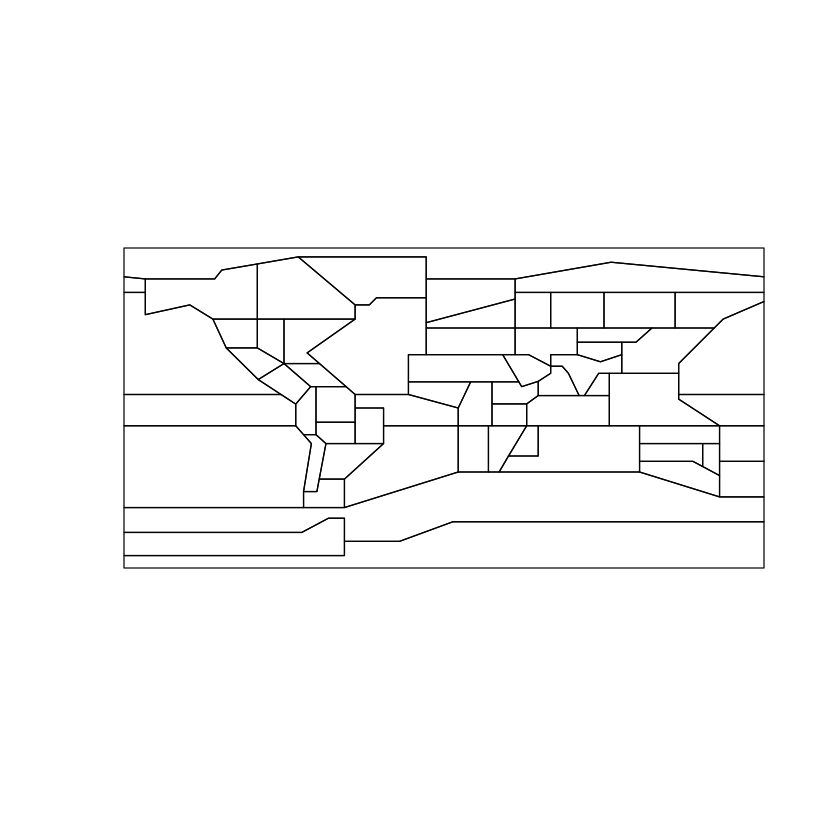

In [6]:
plot(refregions)

In [7]:
temp.dir <- tempdir()
zipfile <- file.path(temp.dir, "world.zip")
download.file(url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/physical/ne_110m_coastline.zip",
              destfile = zipfile)
unzip(zipfile, exdir = temp.dir)

In [8]:
coastLines <- readOGR(dsn = temp.dir, layer = "ne_110m_coastline")

OGR data source with driver: ESRI Shapefile 
Source: "/tmp/RtmpTcyQ2r", layer: "ne_110m_coastline"
with 134 features
It has 3 fields
Integer64 fields read as strings:  scalerank 


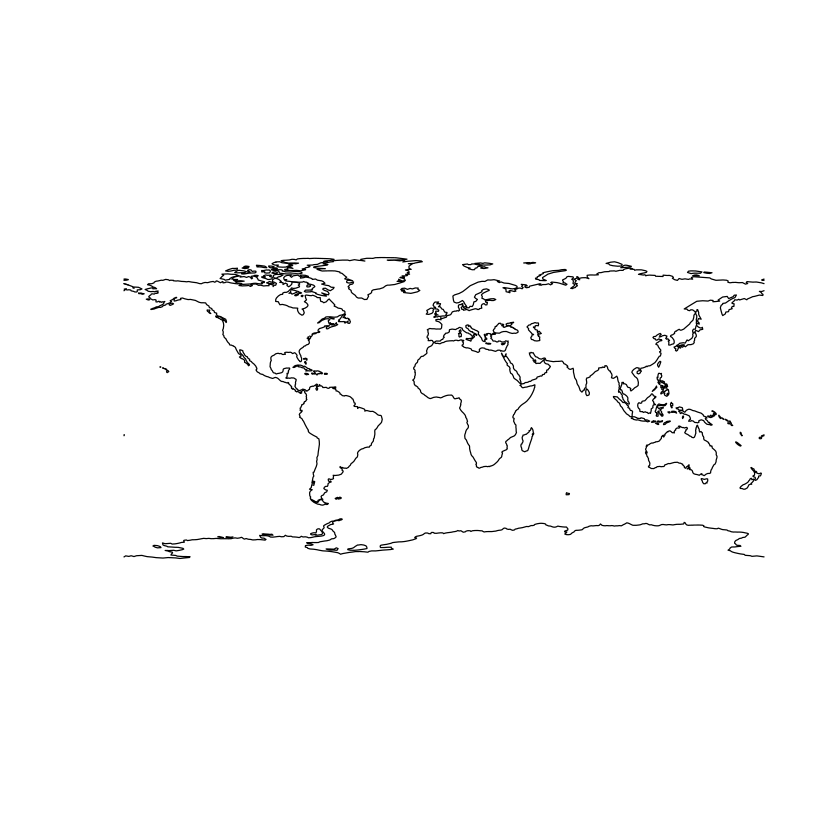

In [9]:
plot(coastLines)

In [10]:
coastLines <- readOGR(dsn = "./auxiliary-material/", layer = "WORLD_coastline")

OGR data source with driver: ESRI Shapefile 
Source: "/home/phanaur/github/Atlas/notebooks/auxiliary-material", layer: "WORLD_coastline"
with 127 features
It has 2 fields


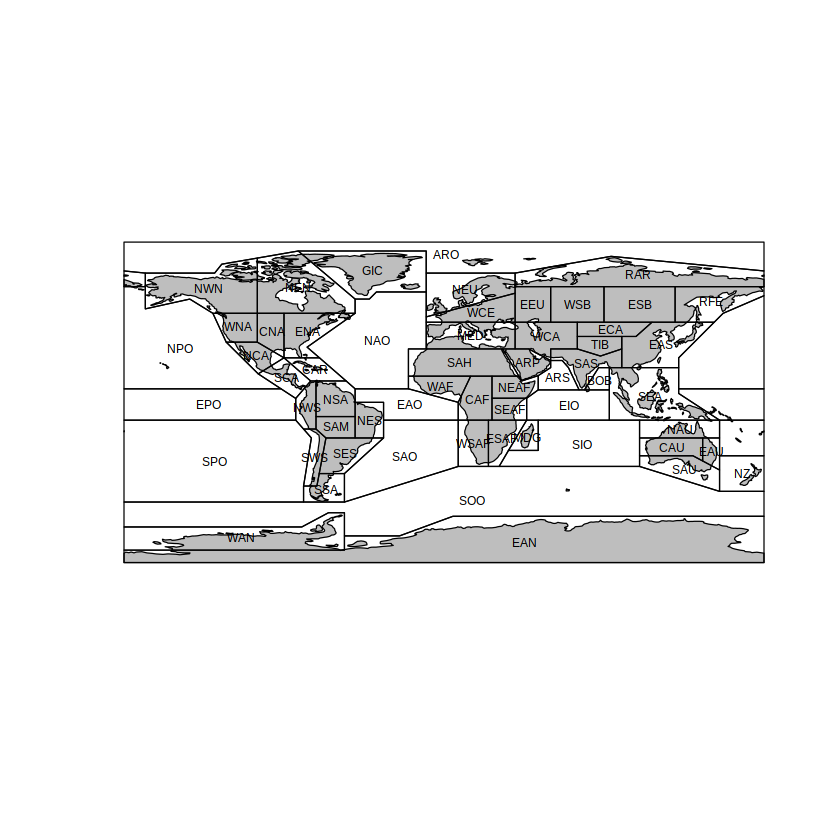

In [11]:
plot(coastLines, col = "grey")
plot(refregions, add = TRUE)
text(x = coordinates(refregions)[ ,1],
     y = coordinates(refregions)[ ,2],
     labels = names(refregions), cex = 0.6)

In [12]:
names(names(refregions))

[1] "GIC"  "NWN"  "NEN"  "WNA"  "CNA"  "ENA"  "NCA"  "SCA"  "CAR"  "NWS" 
[11] "NSA"  "NES"  "SAM"  "SWS"  "SES"  "SSA"  "NEU"  "WCE"  "EEU"  "MED" 
[21] "SAH"  "WAF"  "CAF"  "NEAF" "SEAF" "WSAF" "ESAF" "MDG"  "RAR"  "WSB" 
[31] "ESB"  "RFE"  "WCA"  "ECA"  "TIB"  "EAS"  "ARP"  "SAS"  "SEA"  "NAU" 
[41] "CAU"  "EAU"  "SAU"  "NZ"   "EAN"  "WAN"  "ARO"  "NPO"  "EPO"  "SPO" 
[51] "NAO"  "EAO"  "SAO"  "ARS"  "BOB"  "EIO"  "SIO"  "SOO"

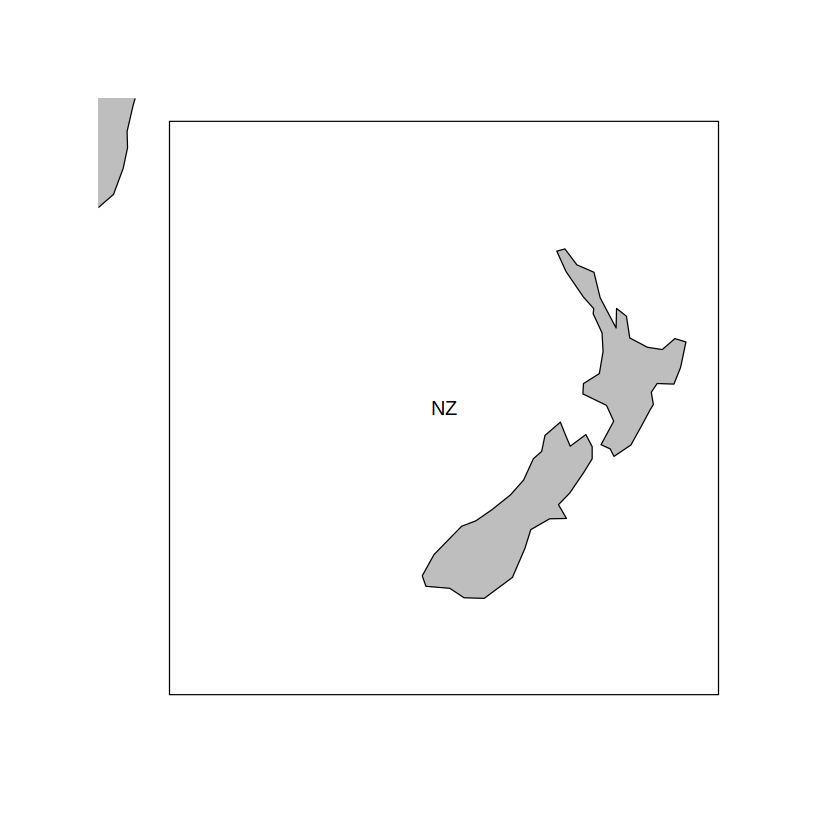

In [13]:
newzealand <- refregions["NZ"]
plot(newzealand)
plot(coastLines, col = "grey", add = TRUE)
text(x = coordinates(newzealand)[,1],
     y = coordinates(newzealand)[,2],
     labels = names(newzealand), cex = 1)

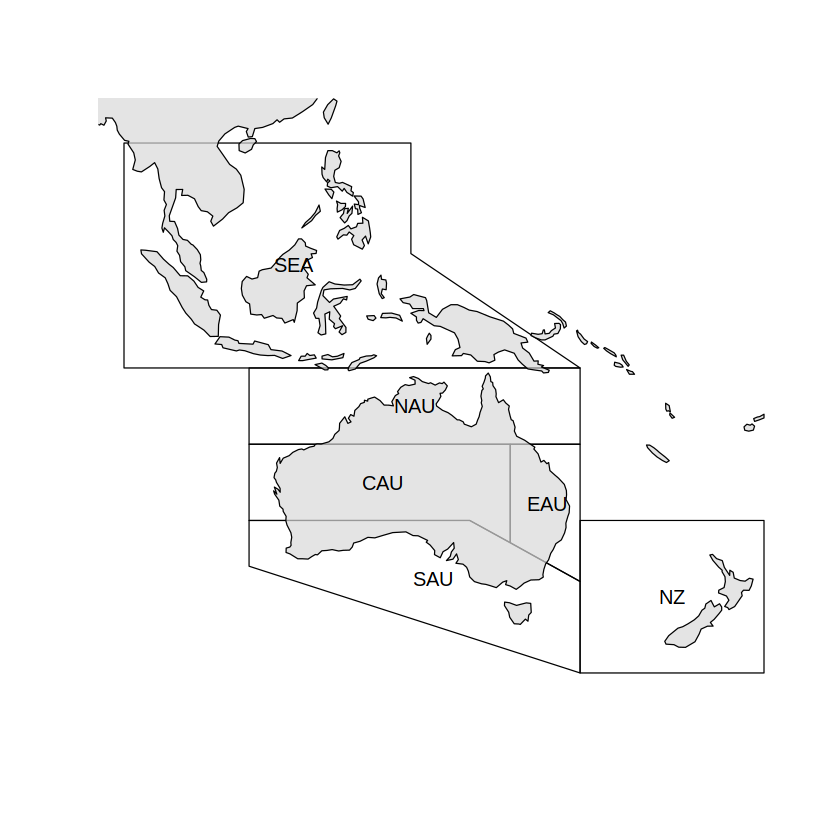

In [14]:
australasia <- refregions[c("NZ", "SEA", "NAU", "CAU", "EAU", "SAU")]

plot(australasia)
plot(coastLines, col = rgb(0.85,0.85,0.85,0.7), add = TRUE)
text(x = coordinates(australasia)[,1],
    y = coordinates(australasia)[,2],
    labels = names(australasia), cex = 1)

In [15]:
library(transformeR)
library(loadeR)
library(visualizeR)
library(geoprocessoR)


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded



Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>



Please see 'citation("transformeR")' to cite this package.



Loading required package: rJava



Loading required package: loadeR.java



Java version 11x amd64 by Azul Systems, Inc. detected



NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



Loading required package: climate4R.UDG



climate4R.UDG version 0.2.3 (2021-07-05) is loaded



Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>



Please use 'citation("climate4R.UDG")' to cite this package.



loadeR version 1.7.1 (2021-07-05) is loaded



Please use 'citation("loadeR")' to cite this package.



visualizeR version 1.6.1 (2021-03-11) is loaded



Please see 'citation("visualizeR")' to cite this package.



geoprocessoR version 0.2.0 (2020-01-06) is loaded



Please see 'citation("geoprocessoR")' to cite this package.



In [16]:
di <- dataInventory("./auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc")
str(di)

[2023-05-07 17:01:27] Doing inventory ...



[2023-05-07 17:01:27] Retrieving info for 'tas' (0 vars remaining)



[2023-05-07 17:01:27] Done.



List of 1
 $ tas:List of 7
  ..$ Description: chr "Near-Surface Air Temperature"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 1980 64 128
  ..$ Units      : chr "K"
  ..$ DataSizeMb : num 64.9
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "30.416 days"
  .. .. ..$ Units     : chr "days since 1850-01-01 0:0:0.0"
  .. .. ..$ Date_range: chr "1850-01-16T12:00:00Z - 2014-12-16T12:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:64] -87.9 -85.1 -82.3 -79.5 -76.7 ...
  .. .. ..$ Shape      : int 64
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:128] 0 2.81 5.62 8.44 11.25 ...
  .. .. ..$ Shape      : int 128
  .. .. ..$ Coordinates: chr "lon"


In [17]:
grid1 <- loadGridData(dataset = "./auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc",
                      var = "tas")

[2023-05-07 17:01:27] Defining geo-location parameters



[2023-05-07 17:01:27] Defining time selection parameters



[2023-05-07 17:01:27] Retrieving data subset ...



[2023-05-07 17:01:31] Done



In [18]:
grid185001 <- subsetGrid(grid1, years = 1850, season = 1, drop = TRUE)

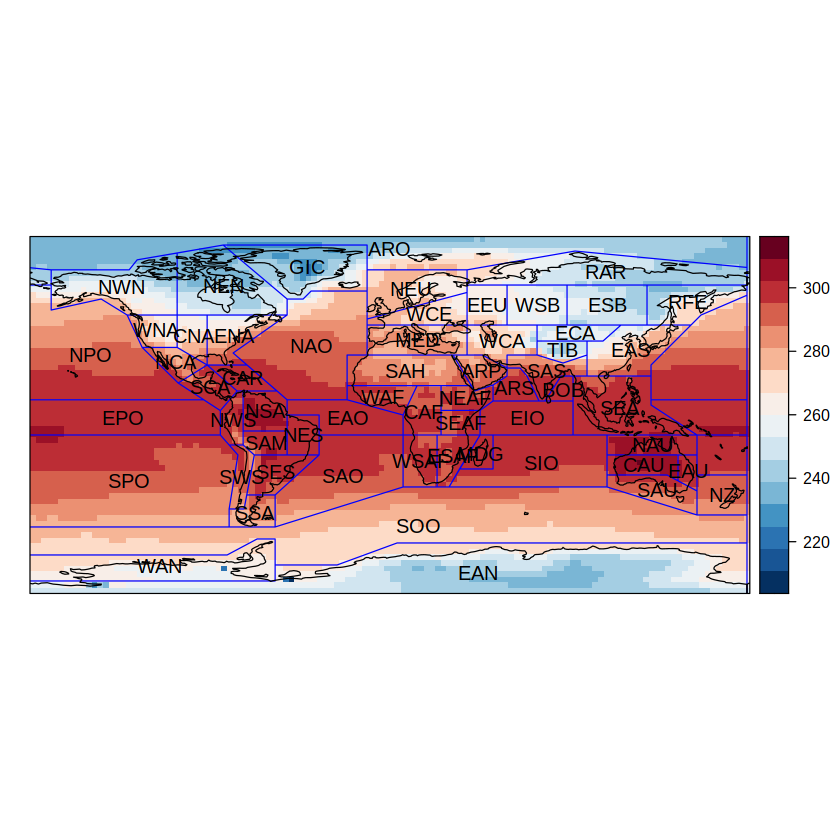

In [19]:
regnameslayer <- list("sp.text", coordinates(refregions), names(refregions))
spatialPlot(grid185001, backdrop.theme = "coastline", 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(list(refregions, first = FALSE, col = "blue"), regnameslayer))

[2023-05-07 17:01:32] Performing annual aggregation...



[2023-05-07 17:01:35] Done.



[2023-05-07 17:01:35] - Computing climatology...



[2023-05-07 17:01:35] - Done.



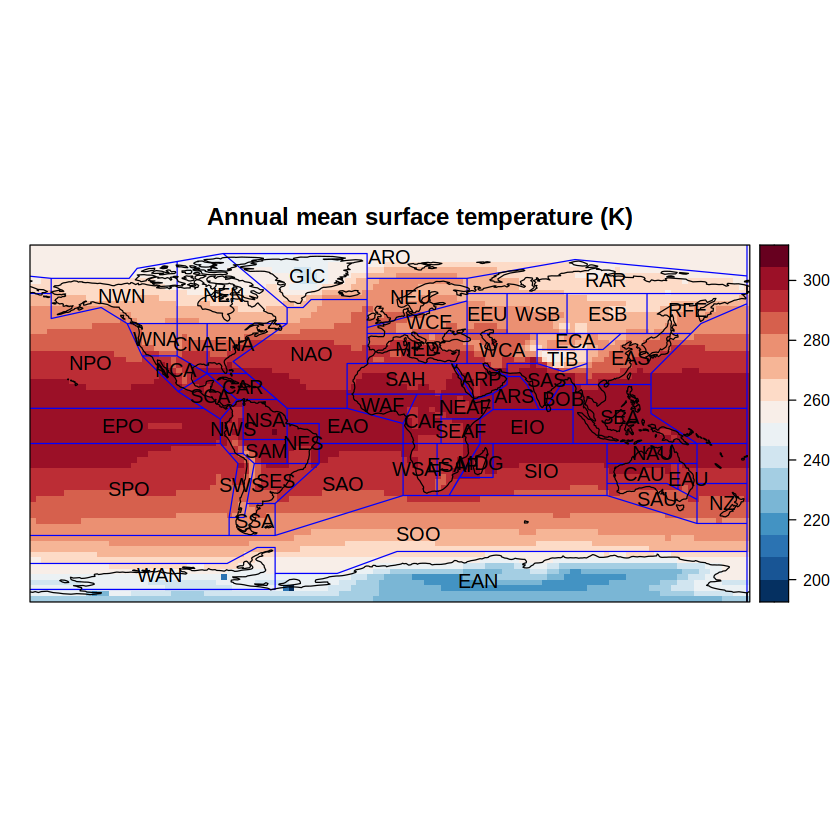

In [20]:
grid1.ann <- aggregateGrid(grid1, aggr.y = list(FUN = "mean", na.rm = TRUE))
spatialPlot(climatology(grid1.ann), backdrop.theme = "coastline", 
            color.theme = "RdBu",
            rev.colors = TRUE,
            main = "Annual mean surface temperature (K)",
            sp.layout = list(list(refregions, first = FALSE, col = "blue"), regnameslayer))

In [21]:
proj4string(refregions)

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”


[1] "+proj=longlat +ellps=WGS84 +no_defs"

In [22]:
grid1.ann <- setGridProj(grid = grid1.ann, proj = proj4string(refregions))

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”


In [23]:
grid1.au <- overGrid(grid1.ann, australasia)

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


[2023-05-07 17:01:36] - Computing climatology...



[2023-05-07 17:01:36] - Done.



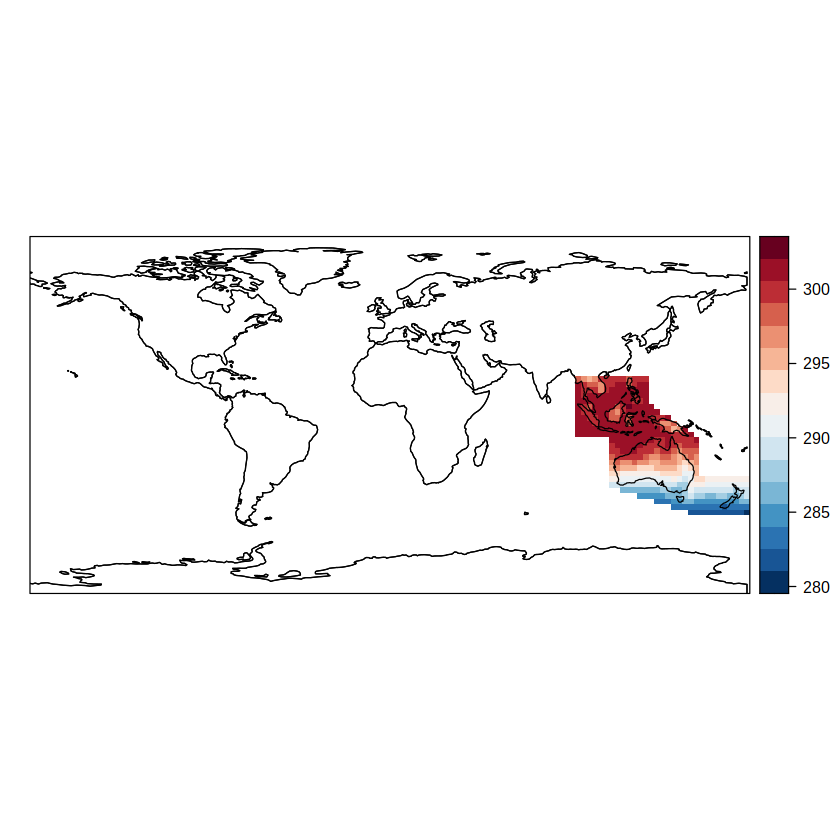

In [24]:
spatialPlot(climatology(grid1.au), 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

In [25]:
grid1.au <- overGrid(grid1.ann, australasia, subset = TRUE)

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


[2023-05-07 17:01:36] - Computing climatology...



[2023-05-07 17:01:36] - Done.



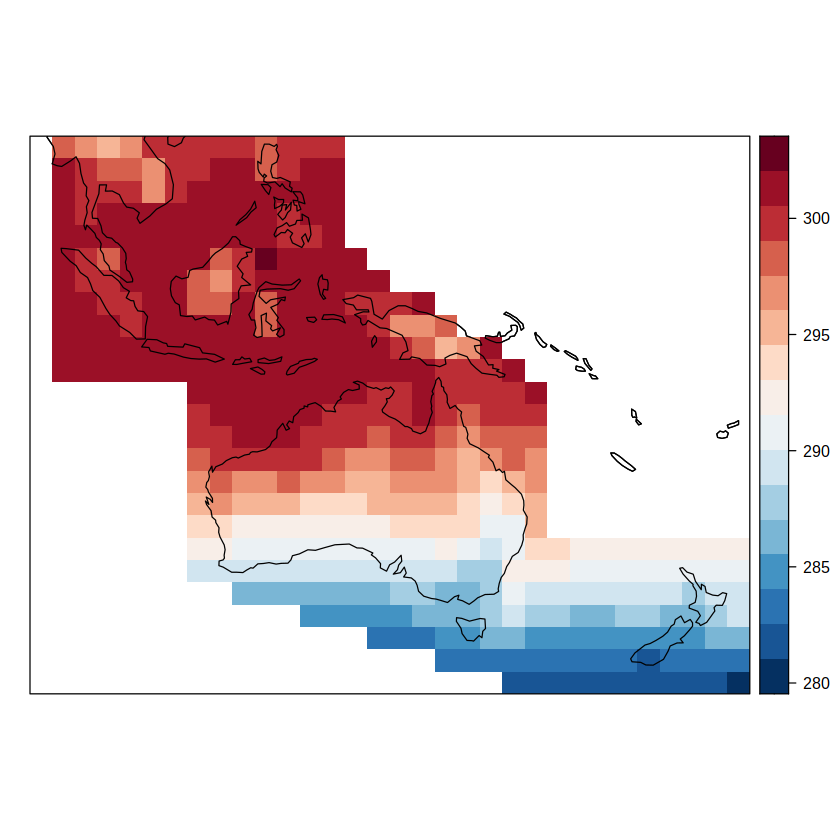

In [26]:
spatialPlot(climatology(grid1.au), 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

pad applied on the interval: year



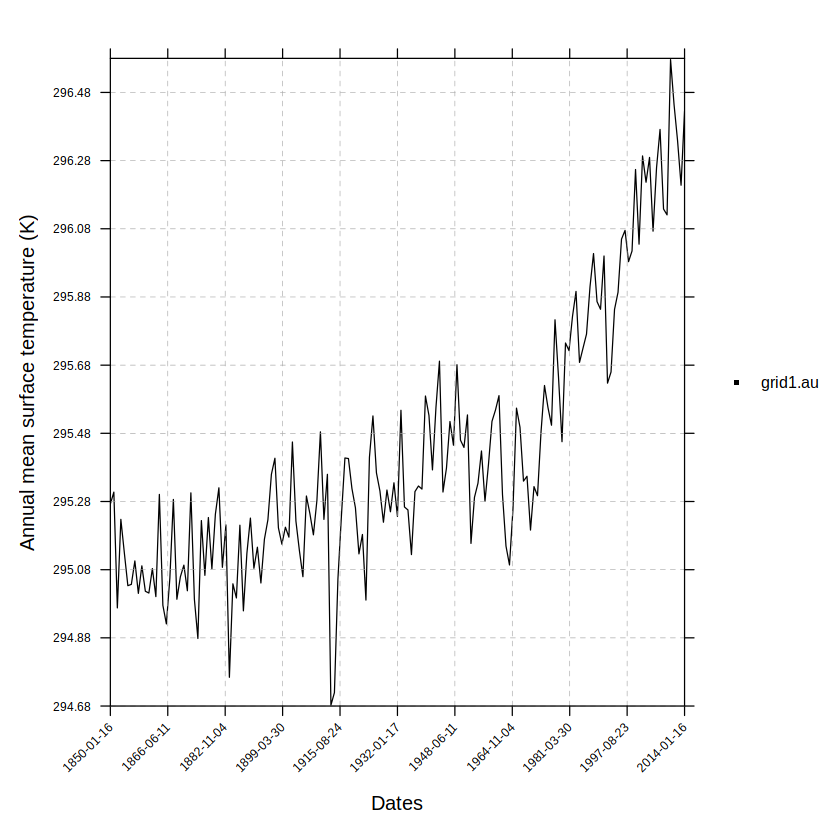

In [27]:
temporalPlot(grid1.au, aggr.spatial = list(FUN = "mean", na.rm = TRUE), xyplot.custom = list(ylab = "Annual mean surface temperature (K)"))

In [28]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Fedora Linux 38 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /home/phanaur/mambaforge/envs/tfg/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=es_ES.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=es_ES.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=es_ES.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] geoprocessoR_0.2.0  visualizeR_1.6.1    loadeR_1.7.1       
 [4] climate4R.UDG_0.2.3 loadeR.java_1.1.1   rJava_1.0-4        
 [7] transformeR_2.1.3   RColorBrewer_1.1-2  rgdal_1.5-16       
[10] sp_1.4-5           

loaded via a namespace (and no